In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\uv_new'

In [8]:
forders_tr = os.listdir(curr_dir+"\\data\\"+"\\uv_train_val")
forders_tr

df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\uv_train_val\\")+forders_tr[0])
df

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200101,0,13,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,-0.00075,...,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0
1,20200101,0,105,128.89098,37.75147,0.0,-0.00057,0.00057,0.00030,-0.00030,...,246.67115,268.22810,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3
2,20200101,0,108,126.96500,37.57100,0.0,0.00000,0.00000,-0.00089,-0.00075,...,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3
3,20200101,0,112,126.62490,37.47772,0.0,-0.00057,-0.00057,-0.00060,0.00015,...,241.55488,258.54927,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3
4,20200101,0,115,130.89864,37.48129,0.0,0.00000,-0.00057,-0.00030,0.00075,...,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533607,20211231,2350,146,127.11900,35.84080,0.1,-0.00057,0.00000,-0.00060,0.00000,...,244.71129,264.82744,264.95943,264.36433,254.82929,162.52921,41.81018,-8.87355,62.90,3
1533608,20211231,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00179,-0.00015,...,241.75728,259.19303,257.86443,257.39333,249.08495,163.96606,41.52495,-8.99640,82.00,2
1533609,20211231,2350,156,126.89158,35.17294,0.0,0.00000,0.00000,0.00000,0.00105,...,242.90744,260.33453,260.00405,259.18646,250.92709,162.84572,41.04849,-8.87987,72.38,3
1533610,20211231,2350,159,129.03203,35.10468,0.0,-0.00057,-0.00057,0.00089,-0.00015,...,242.68420,259.36253,258.24370,256.93511,247.71243,164.15158,40.96396,-8.99480,69.56,3


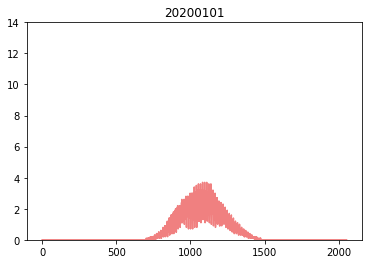

In [81]:
d = df[df['yyyymmdd']==20200101]
d = d.reset_index()
d = d.drop('index', axis=1)

d['uv'].plot(color='lightcoral')
plt.xticks([0,500,1000,1500,2000])
plt.ylim([0,14])
plt.title('20200101')
plt.savefig('20200101_uv.png')

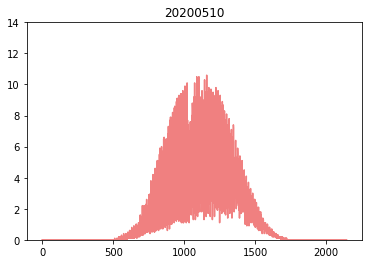

In [82]:
d = df[df['yyyymmdd']==20200510]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20200510')
plt.savefig('20200510_uv.png')

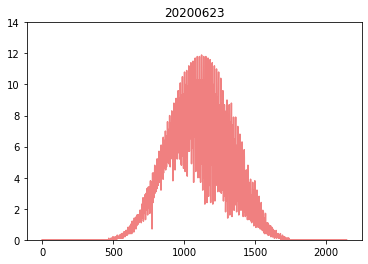

In [83]:
d = df[df['yyyymmdd']==20200623]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20200623')
# plt.savefig('20200623_uv.png')

Text(0.5, 1.0, '20200630')

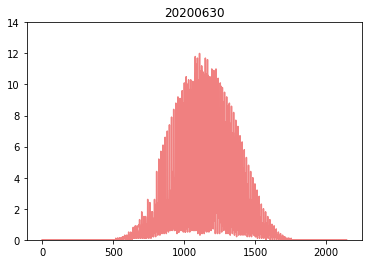

In [98]:
d = df[df['yyyymmdd']==20200630]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20200630')
# plt.savefig('20200630_uv.png')

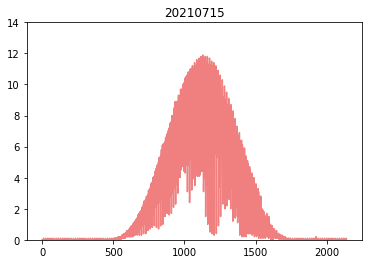

In [94]:
d = df[df['yyyymmdd']==20210715]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20210715')
plt.savefig('20210715_uv.png')

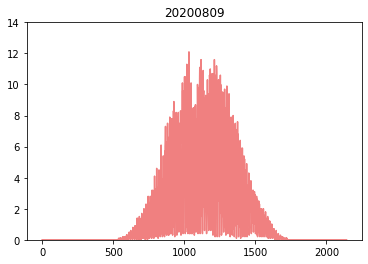

In [85]:
d = df[df['yyyymmdd']==20200809]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20200809')
plt.savefig('20200809_uv.png')

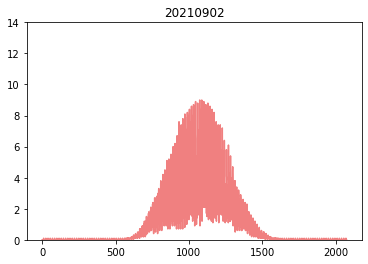

In [110]:
d = df[df['yyyymmdd']==20210902]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20210902')
plt.savefig('20210902_uv.png')

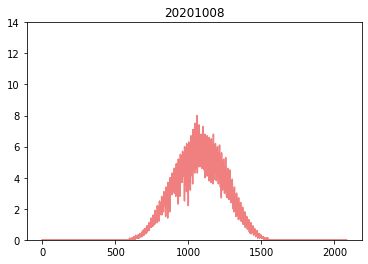

In [131]:
d = df[df['yyyymmdd']==20201008]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20201008')
plt.savefig('20201008_uv.png')

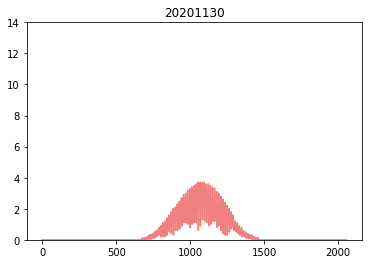

In [149]:
d = df[df['yyyymmdd']==20201130]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20201130')
plt.savefig('20201130_uv.png')

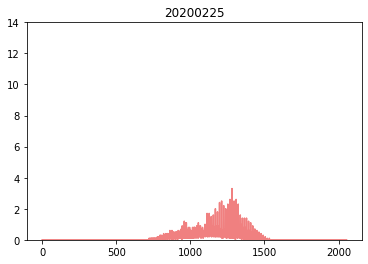

In [152]:
d = df[df['yyyymmdd']==20200225]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20200225')
plt.savefig('20200225_uv.png')

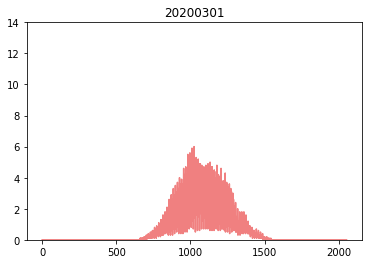

In [166]:
d = df[df['yyyymmdd']==20200301]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20200301')
plt.savefig('20200301_uv.png')

(0.0, 14.0)

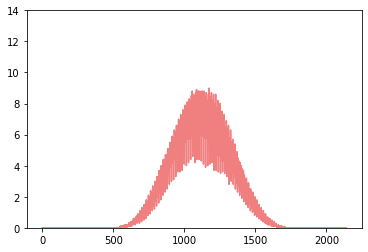

In [177]:
d = df[df['yyyymmdd']==20210420]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
# plt.title('20201008')
# plt.savefig('20201008_uv.png')

In [ ]:
## 4월도 꽤 영향보이는군..

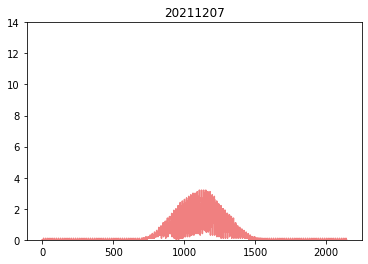

In [88]:
d = df[df['yyyymmdd']==20211207]
d = d.reset_index()
d = d.drop('index', axis=1)


d['uv'].plot(color='lightcoral')
plt.ylim([0,14])
plt.title('20211207')
plt.savefig('20211207_uv.png')